In [32]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
advertising = pd.read_csv('advertising.csv')
advertising.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [6]:
advertising = (advertising - advertising.mean())/advertising.std()
advertising.head()

,TV,Radio,Newspaper,Sales
0,0.967425,0.979066,1.774493,1.319009
1,-1.194379,1.080097,0.667903,-0.895268
2,-1.512360,1.524637,1.779084,-0.592461
3,0.051919,1.214806,1.283185,0.259184
4,0.393196,-0.839507,1.278593,0.524140


In [7]:
X = advertising[["TV","Radio","Newspaper"]]
y = advertising["Sales"]

In [13]:
X["Intercept"] = 1
X = X.reindex(["Intercept","TV","Radio","Newspaper"], axis = 1)
X.head()

,Intercept,TV,Radio,Newspaper
0,1,0.967425,0.979066,1.774493
1,1,-1.194379,1.080097,0.667903
2,1,-1.512360,1.524637,1.779084
3,1,0.051919,1.214806,1.283185
4,1,0.393196,-0.839507,1.278593


In [17]:
def costFunction(X,y,theta):
    return np.sum(np.square(np.matmul(X,theta) - y)) / (2*len(y))

In [20]:
def gradientDescent(X, y, theta = np.array([0,0,0,0]), alpha = 0.01, iterations = 1000):    
    gdm_df = pd.DataFrame( columns = ['Bets','cost'])

    for i in range(iterations):
        gradient = (1/len(X)) * np.matmul(X.T, np.matmul(X, theta) - y)
        theta = theta - alpha * gradient
        cost = costFunction(X, y, theta)
        gdm_df.loc[i] = [theta,cost]

    return gdm_df

In [23]:
# Initialization 
theta = np.array([0,0,0,0])
alpha = 0.05
iterations = 1000

In [25]:
X = np.array(X)
y = np.array(y)

In [26]:
gradientDescent(X,y,theta,alpha, iterations)

,Bets,cost
0,"[-2.2204460492503135e-18, 0.04483509368679096,...",0.451302
1,"[-4.6629367034256585e-18, 0.08737006519532979,...",0.409986
2,"[-5.1070259132757215e-18, 0.12772473754701041,...",0.373022
3,"[-6.217248937900878e-18, 0.16601257347329568, ...",0.339938
4,"[-7.771561172376098e-18, 0.20234102058371045, ...",0.310317
...,...,...
995,"[7.68829444552921e-18, 0.8846510617594473, 0.3...",0.048461
996,"[7.68829444552921e-18, 0.8846510617594473, 0.3...",0.048461
997,"[7.549516567451065e-18, 0.8846510617594473, 0....",0.048461
998,"[7.549516567451065e-18, 0.8846510617594473, 0....",0.048461


In [30]:
print(gradientDescent(X, y, theta, alpha, iterations)['cost'])

0      0.451302
1      0.409986
2      0.373022
3      0.339938
4      0.310317
         ...   
995    0.048461
996    0.048461
997    0.048461
998    0.048461
999    0.048461
Name: cost, Length: 1000, dtype: float64


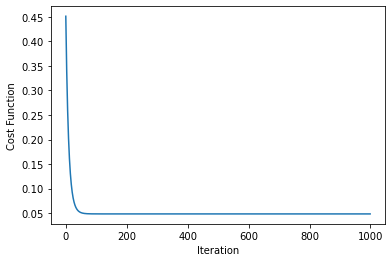

In [35]:
plt.plot(np.arange(0,1000), gradientDescent(X, y, theta, alpha, iterations)['cost'])
plt.xlabel("Iteration")
plt.ylabel("Cost Function")
plt.show()